# Health Insurance Claims Exploratory Data Analysis

In [7]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns


In [9]:
insurance_csv = pd.read_csv("insurance.csv")
print(f"Rows: {insurance_csv.shape[0]}")
print(f"Columns: {insurance_csv.shape[1]}")
insurance_csv.info()

Rows: 1338
Columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insurance_csv.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


statement on how data looks before analysis

<Figure size 720x720 with 0 Axes>

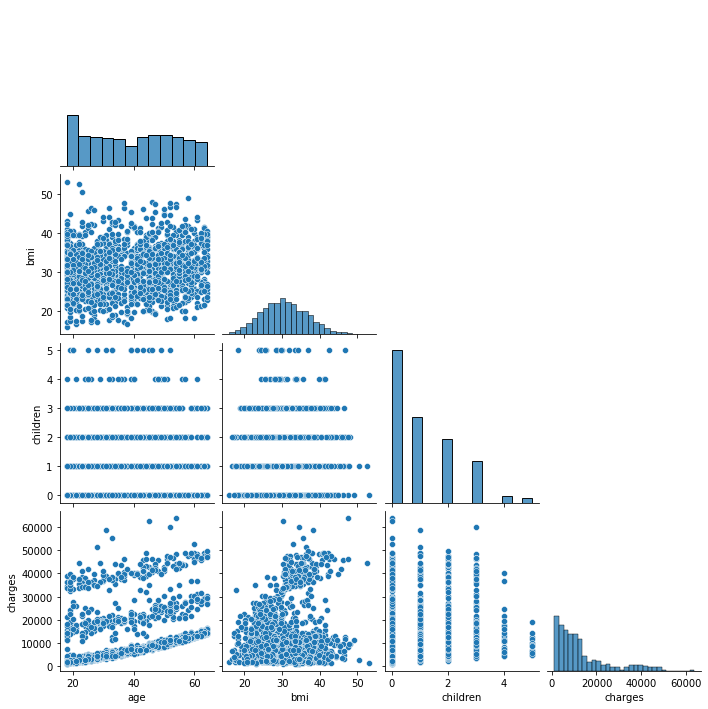

In [11]:
plt.figure(figsize=(10, 10))
sns.pairplot(insurance_csv, diag_kind='hist', corner=True)

statement on how most plots look normal except for age vs charges

<Figure size 720x576 with 0 Axes>

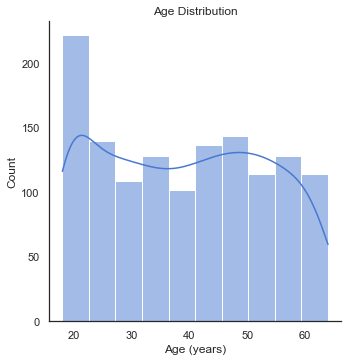

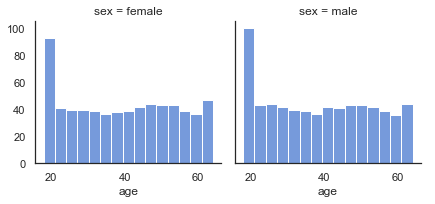

In [36]:
plt.figure(figsize = (10, 8))
sns.set_theme(style="white", palette="muted", color_codes=True)
sns.displot(insurance_csv['age'], bins = 10, color = 'b', kde = True)
plt.title("Age Distribution")
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

g = sns.FacetGrid(insurance_csv, col='sex')
g.map(sns.histplot, 'age', bins=15)
g.add_legend()
plt.show()

analysis about how male and female distribution across ages is almost identical

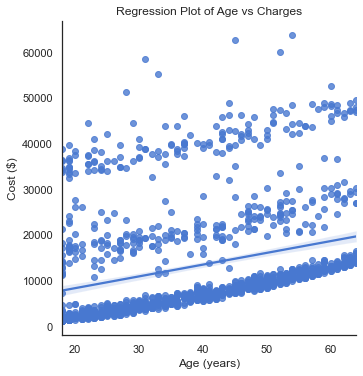

Slope: 257.72
Intercept: $3165.89


In [30]:
# Linear Regression
age_model = LinearRegression()
age_model.fit(insurance_csv[['age']], insurance_csv['charges'])
age_slope = age_model.coef_[0]
age_intercept = age_model.intercept_

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True)
plt.title('Regression Plot of Age vs Charges')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')
plt.show()

print(f"Slope: {age_slope:.2f}")
print(f"Intercept: ${age_intercept:.2f}")

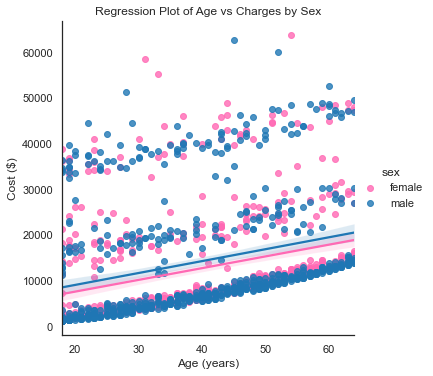

Male slope: 260.68
Female slope: 257.01
Difference: 3.67
Male intercept: $3811.77
Female intercept: $2416.85
Difference: $1394.93


In [29]:
# Separate data by sex
male_data = insurance_csv[insurance_csv['sex'] == 'male']
female_data = insurance_csv[insurance_csv['sex'] == 'female']

# Fit regression models
male_model = LinearRegression()
female_model = LinearRegression()

male_model.fit(male_data[['age']], male_data['charges'])
female_model.fit(female_data[['age']], female_data['charges'])

# Get slopes and y-intercepts
male_slope = male_model.coef_[0]
male_intercept = male_model.intercept_
female_slope = female_model.coef_[0]
female_intercept = female_model.intercept_

# Plot
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='sex', palette={'male': '#1f77b4', 'female': '#ff69b4'})
plt.title('Regression Plot of Age vs Charges by Sex')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')
plt.show()

print(f"Male slope: {male_slope:.2f}")
print(f"Female slope: {female_slope:.2f}")
print(f"Difference: {abs(male_slope - female_slope):.2f}")

print(f"Male intercept: ${male_intercept:.2f}")
print(f"Female intercept: ${female_intercept:.2f}")
print(f"Difference: ${abs(male_intercept - female_intercept):.2f}")

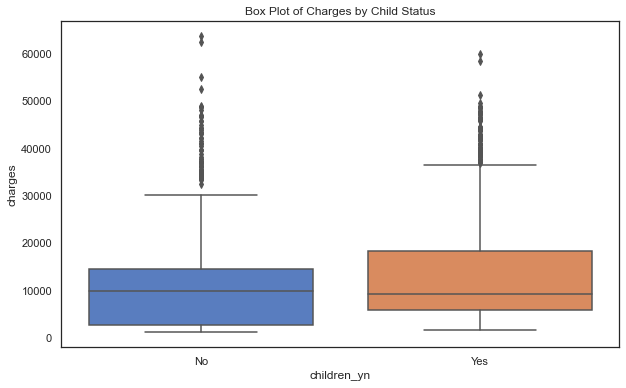

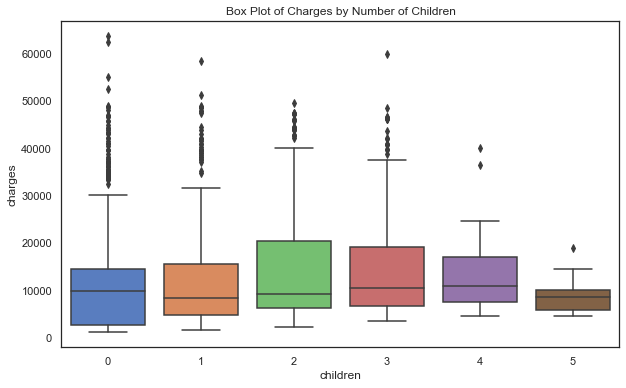

In [21]:
# Simplify the children column to Yes/No
insurance_csv['children_yn'] = insurance_csv['children'].apply(lambda x: 'Yes' if x >= 1 else 'No')
plt.figure(figsize=(10, 6))
sns.boxplot(x='children_yn', y='charges', data=insurance_csv)
plt.title('Box Plot of Charges by Child Status')
plt.show()

# Analyze the effect of children on charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=insurance_csv)
plt.title('Box Plot of Charges by Number of Children')
plt.show()


Text(19.295303472222223, 0.5, 'Cost ($)')

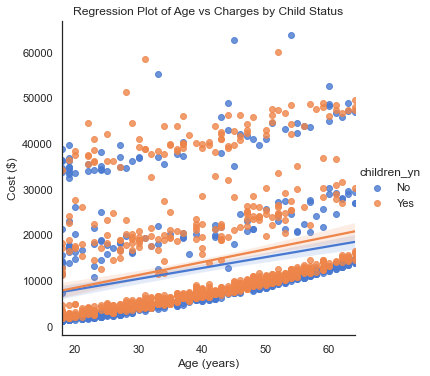

In [18]:

sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='children_yn')
plt.title('Regression Plot of Age vs Charges by Child Status')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')

statement on how child status does not reflect the higher costs in regression plot

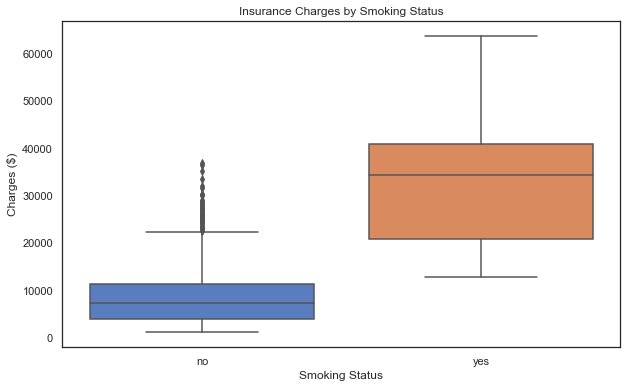

Median charges for smokers: $34456.35
Median charges for non-smokers: $7345.41


In [26]:
# Plot smoking status against charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance_csv, order=['no', 'yes'])
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges ($)')
plt.show()

smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'yes']['charges'].median()
non_smoker_median_charges = insurance_csv[insurance_csv['smoker'] == 'no']['charges'].median()
print(f"Median charges for smokers: ${smoker_median_charges:.2f}")
print(f"Median charges for non-smokers: ${non_smoker_median_charges:.2f}")

<Figure size 720x432 with 0 Axes>

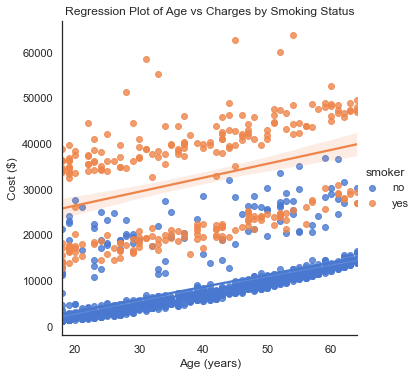

Smoker slope: 305.24
Non-smoker slope: 267.25
Difference: 37.99
Smoker intercept: $20294.13
Non-smoker intercept: $-2091.42


In [32]:
# Regression of age vs charges by smoking status
smoker_model = LinearRegression()
nonsmoker_model = LinearRegression()

smoker_model.fit(insurance_csv[insurance_csv['smoker'] == 'yes'][['age']], insurance_csv[insurance_csv['smoker'] == 'yes']['charges'])
nonsmoker_model.fit(insurance_csv[insurance_csv['smoker'] == 'no'][['age']], insurance_csv[insurance_csv['smoker'] == 'no']['charges'])

smoker_slope = smoker_model.coef_[0]
smoker_intercept = smoker_model.intercept_
nonsmoker_slope = nonsmoker_model.coef_[0]
nonsmoker_intercept = nonsmoker_model.intercept_

plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', data=insurance_csv, fit_reg=True, hue='smoker', hue_order=['no', 'yes'])
plt.title('Regression Plot of Age vs Charges by Smoking Status')
plt.xlabel('Age (years)')
plt.ylabel('Cost ($)')
plt.show()

print(f"Smoker slope: {smoker_slope:.2f}")
print(f"Non-smoker slope: {nonsmoker_slope:.2f}")
print(f"Difference: {abs(smoker_slope - nonsmoker_slope):.2f}")
print(f"Smoker intercept: ${smoker_intercept:.2f}")
print(f"Non-smoker intercept: ${nonsmoker_intercept:.2f}")

statement on how smoking dramatically increases insurance cost